In [3]:
from TA_gp import *
from TA_plot import *
from similarity import *
from gpytorch.kernels import Kernel, MaternKernel, RBFKernel

In [4]:
fixed_params = {
    'Drive fitness': 0.88,
    'Release percent': 0.25,
    'Embryo cut rate': 0.95,
    'Germline cut rate': 0.99,
}
param_ranges = {
    "Drive fitness" : (0.5, 1),
    "Release percent" : (0, 1),
    "Embryo cut rate" : (0, 1),
    "Germline cut rate" : (0, 1),
}

In [ ]:
# periodic/polynomial fail
    # Training data points might be too close or repeated

for kernel in ['matern', 'rbf', 'rq']:#, 'periodic', 'polynomial']:
    model = TA_GP('1.csv', kernel = kernel)
    model.train(1)
    plot_1d(model, 'Drive fitness', fixed_params = fixed_params, param_ranges = param_ranges)

#model.get_adaptive_points(thres=0.95)

In [ ]:
class CompoundKernel(Kernel):
    def __init__(self, kernel_1, kernel_2, operation):
        super(CompoundKernel, self).__init__()
        self.kernel_1 = kernel_1
        self.kernel_2 = kernel_2
        self.operation = operation

    def forward(self, x1, x2):
        if self.operation == 'add':
            output = self.kernel_1(x1, x2) + self.kernel_2(x1, x2)
        
        return ScaleKernel(output)

In [ ]:
add_kernel = CompoundKernel(MaternKernel(), RBFKernel(), 'add')

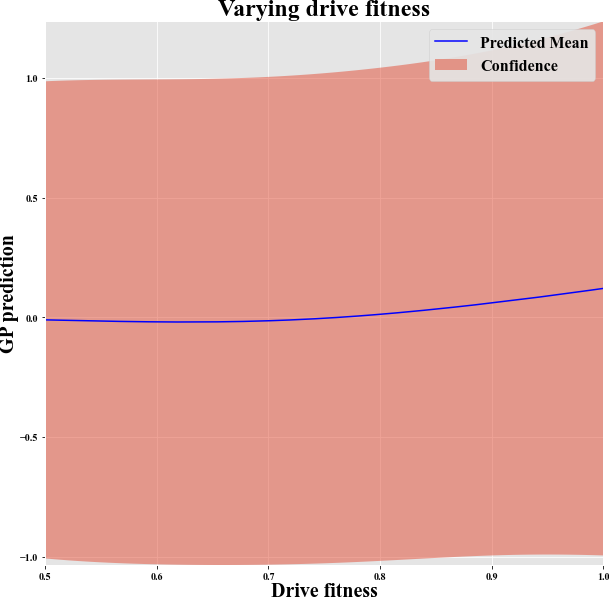

In [6]:
model = TA_GP('1.csv', compound = 'add', k1 = MaternKernel(), k2 = RBFKernel())
model.train(1)
plot_1d(model, 'Drive fitness', fixed_params = fixed_params, param_ranges = param_ranges)